# Lab2: Linear Regression and Stochastic Gradient Descent

## Step1: Import and devide dataset.
- feature matrix needs to be transformed from sparse matrix to dense matrix using .todense() function.
- targets need to be transformed to n*1 shape. 

In [1]:
from numpy import *
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_svmlight_file

train_features, train_targets = load_svmlight_file("a9a", n_features=123)
test_features, test_targets = load_svmlight_file("a9a.t", n_features=123)

train_targets =  train_targets.reshape(train_targets.shape[0],1)
test_targets =  test_targets.reshape(test_targets.shape[0],1)

train_targets[train_targets == -1] = 0
test_targets[test_targets == -1] = 0


## Step2：Initialize linear model parameters.
- theta is a n*1 matrix, otherwise there will be a number of errors during matrix operation.
- alpha, representing learning rate, should be small enough.

In [2]:
import numpy as np

m, n = np.shape(train_features)
theta = np.ones((n, 1))
alpha = 0.05
maxIteration = 500


## Step3: Choose loss function and calculate loss

In [3]:
def cal_loss(x,y,theta):
    return  -( y*log(sigmoid(x * theta)) + (1-y)*log(1-sigmoid(x * theta)) ).sum()/ x.shape[0]

def sigmoid(a):
    return 1/(1+exp(-a))

def cal_accur(x,y,theta):
    hypothesis =sigmoid( x * theta)
    hypothesis[hypothesis > 0.5] = 1
    hypothesis[hypothesis <= 0.5] = 0
    return np.count_nonzero(hypothesis==y)/ x.shape[0]


## Step4: Stochastic gradient descent function

In [4]:
def cal_gradient_sgd(w):
    random_num = random.randint(0,m)
    return (train_features[random_num].T * (sigmoid(train_features[random_num] * w) - train_targets[random_num]))

train_loss, evaluation_loss,train_accr,evaluation_accr = [],[],[],[]

def SGD(theta):
    for i in range(0, maxIteration):
        gradient = cal_gradient_sgd(theta)
        theta = theta - alpha * gradient 
        
        train_loss.append(cal_loss(train_features,train_targets,theta))
        evaluation_loss.append(cal_loss(test_features,test_targets,theta))
        train_accr.append(cal_accur(train_features,train_targets,theta))
        evaluation_accr.append(cal_accur(test_features,test_targets,theta))

SGD(theta)

## Step5: Draw graph
- The blue line represents the loss of train, and the orange line represents the loss of eva

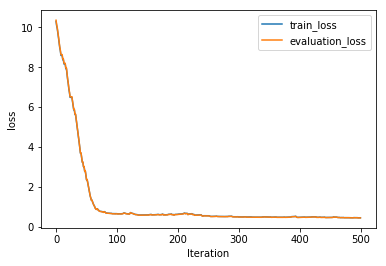

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.xlabel("Iteration")
plt.ylabel("loss")
plt.plot(train_loss, label="train_loss")
plt.plot(evaluation_loss,label="evaluation_loss" )
plt.legend(loc ='upper right')


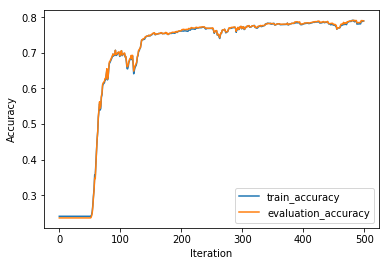

In [6]:
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.plot(train_accr, label="train_accuracy")
plt.plot(evaluation_accr, label="evaluation_accuracy")
plt.legend(loc="lower right")


# Four  Optimized Methods of Gradient Descent

## 1. NAG

In [7]:
train_loss_nag,evaluation_loss_nag,train_accr_nag,evaluation_accr_nag = [],[],[],[]
theta = np.ones((n, 1))

def NAG(theta):
    gama = 0.9
    vt = 0

    for i in range(0, maxIteration):
        gradient = cal_gradient_sgd(theta - gama*vt)
        vt = gama*vt + alpha * gradient
        theta = theta - vt

        train_loss_nag.append(cal_loss(train_features,train_targets,theta))
        evaluation_loss_nag.append(cal_loss(test_features,test_targets,theta))
        train_accr_nag.append(cal_accur(train_features,train_targets,theta))
        evaluation_accr_nag.append(cal_accur(test_features,test_targets,theta))
        
NAG(theta)

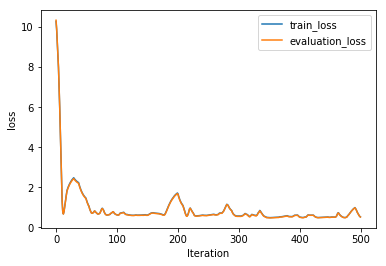

In [8]:
plt.xlabel("Iteration")
plt.ylabel("loss")
plt.plot(train_loss_nag, label="train_loss")
plt.plot(evaluation_loss_nag,label="evaluation_loss" )
plt.legend(loc ='upper right')

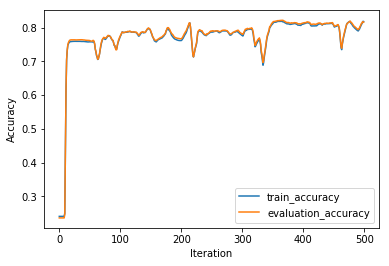

In [9]:
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.plot(train_accr_nag, label="train_accuracy")
plt.plot(evaluation_accr_nag, label="evaluation_accuracy")
plt.legend(loc="lower right")

 ## 2. RMSProp

In [10]:
train_loss_RMSProp,evaluation_loss_RMSProp,train_accr_RMSProp,evaluation_accr_RMSProp = [],[],[],[]
theta = np.ones((n, 1))

def RMSProp(theta):
    gama = 0.9
    vt = 0
    Egt = 0
    e=0.00000001  
    
    learning_rate = 0.3

    for i in range(0, maxIteration):
        gradient = cal_gradient_sgd(theta - gama*vt)
        Egt = gama * Egt + ((1-gama)*(gradient**2)).sum()  
        theta = theta - learning_rate*gradient/math.sqrt(Egt + e)  

        train_loss_RMSProp.append(cal_loss(train_features,train_targets,theta))
        evaluation_loss_RMSProp.append(cal_loss(test_features,test_targets,theta))
        train_accr_RMSProp.append(cal_accur(train_features,train_targets,theta))
        evaluation_accr_RMSProp.append(cal_accur(test_features,test_targets,theta))
        
RMSProp(theta)


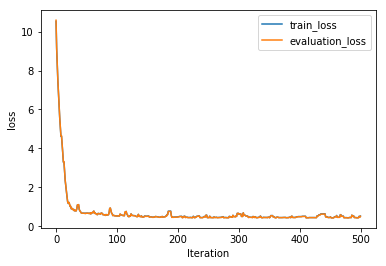

In [11]:
plt.xlabel("Iteration")
plt.ylabel("loss")
plt.plot(train_loss_RMSProp, label="train_loss")
plt.plot(evaluation_loss_RMSProp,label="evaluation_loss" )
plt.legend(loc ='upper right')

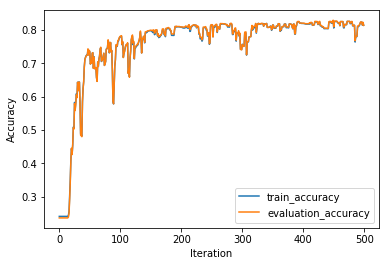

In [12]:
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.plot(train_accr_RMSProp, label="train_accuracy")
plt.plot(evaluation_accr_RMSProp, label="evaluation_accuracy")
plt.legend(loc="lower right")

## 3. AdaDelta

![](https://i.stack.imgur.com/aojCe.png)

In [13]:
train_loss_adaDelta,evaluation_loss_adaDelta,train_accr_adaDelta,evaluation_accr_adaDelta = [],[],[],[]
theta = np.ones((n, 1))

def adaDelta(theta):

    rho = 0.9
    Egt=0  
    Edt = 0  
    e=0.00000001  
    delta = 0  
    learning_rate = 2000

    for i in range(0, maxIteration):
        
        gradient = cal_gradient_sgd(theta)
        Egt = rho * Egt + ((1-rho)*(gradient**2) ).sum()  
        delta = - math.sqrt(Edt + e)*gradient/math.sqrt(Egt + e)
        Edt =rho*Edt+( (1-rho)*(delta**2) ).sum()  
        theta = theta + learning_rate*delta 
        
        train_loss_adaDelta.append(cal_loss(train_features,train_targets,theta))
        evaluation_loss_adaDelta.append(cal_loss(test_features,test_targets,theta))
        train_accr_adaDelta.append(cal_accur(train_features,train_targets,theta))
        evaluation_accr_adaDelta.append(cal_accur(test_features,test_targets,theta))
        
adaDelta(theta)


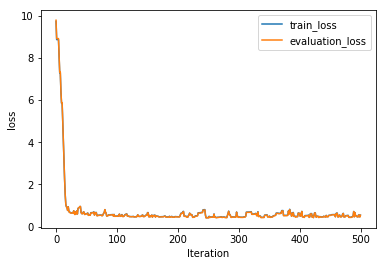

In [14]:
plt.xlabel("Iteration")
plt.ylabel("loss")
plt.plot(train_loss_adaDelta, label="train_loss")
plt.plot(evaluation_loss_adaDelta,label="evaluation_loss" )
plt.legend(loc ='upper right')


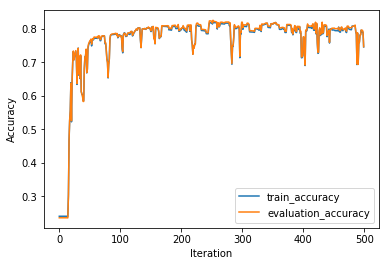

In [15]:
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.plot(train_accr_adaDelta, label="train_accuracy")
plt.plot(evaluation_accr_adaDelta, label="evaluation_accuracy")
plt.legend(loc="lower right")

## 4.Adam

In [16]:
train_loss_adam,evaluation_loss_adam,train_accr_adam,evaluation_accr_adam = [],[],[],[]
theta = np.ones((n, 1))

def adam(theta):
 
    t = 0 
    m = 0  
    v = 0  
    b1 = 0.9  
    b2 = 0.995  
    learning_rate = 0.05
    
    for i in range(0, maxIteration):
        
        gradient = cal_gradient_sgd(theta)
        t +=1 
        m = b1*m + ((1-b1)*gradient).sum() 
        v = b2*v + ((1-b2)*(gradient**2)).sum()  
        mt = m/(1-(b1**t))  
        vt = v/(1-(b2**t)) 
        theta = theta- learning_rate * mt/(math.sqrt(vt)+e) 
        
        train_loss_adam.append(cal_loss(train_features,train_targets,theta))
        evaluation_loss_adam.append(cal_loss(test_features,test_targets,theta))
        train_accr_adam.append(cal_accur(train_features,train_targets,theta))
        evaluation_accr_adam.append(cal_accur(test_features,test_targets,theta))
        
adam(theta)

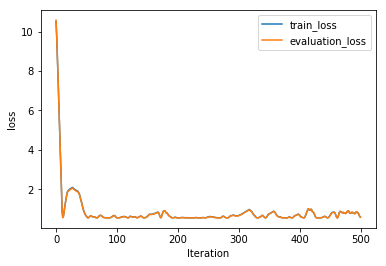

In [17]:
plt.xlabel("Iteration")
plt.ylabel("loss")
plt.plot(train_loss_adam, label="train_loss")
plt.plot(evaluation_loss_adam,label="evaluation_loss" )
plt.legend(loc ='upper right')

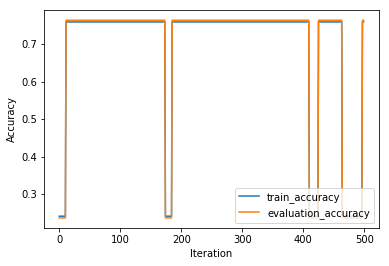

In [18]:
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.plot(train_accr_adam, label="train_accuracy")
plt.plot(evaluation_accr_adam, label="evaluation_accuracy")
plt.legend(loc="lower right")

# Graph of five different stochastic gradient descent methods

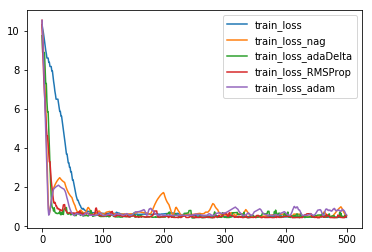

In [19]:

plt.plot(train_loss, label="train_loss")
plt.plot(train_loss_nag, label="train_loss_nag")
plt.plot(train_loss_adaDelta, label="train_loss_adaDelta")
plt.plot(train_loss_RMSProp, label ="train_loss_RMSProp")
plt.plot(train_loss_adam, label="train_loss_adam")
plt.legend(loc="upper right")
